# U.S. Medical Insurance Costs

#### Codecademy project practice by CodenificienT

## Working with CSV data

In [350]:
import csv

In [351]:
with open("insurance.csv") as csv_file:
    csv_content = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_content:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        if line_count < 4:
            line_count += 1
            print(row)

Column names are age, sex, bmi, children, smoker, region, charges
{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}


##### Find the columns

In [353]:
data_columns = row.keys()

In [354]:
data_columns

dict_keys(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

### Scoping the project
- CSV data provides enough info to compute the insurance cost for hundreds of patients in the database.
- Use previous experience to derive a formula for the line of best fit
- then use that formula to guess the insurance costs for a few dozen customers in the dataset.
- After estimating their insurance costs, use the original data to compute the total error
- Can graph the estimates versus real values if there is time


### Implementing the project

##### Count the number of rows in the data

In [358]:
num_rows = 0

In [359]:
with open("insurance.csv") as csv_file:
    csv_content = csv.DictReader(csv_file)
    num_rows = sum(1 for row in csv_content)
    print("There are", num_rows, "rows in the file")

There are 1338 rows in the file


##### Implement formula for Insurance costs

In [361]:
# Create calculate_insurance_cost() function below: 
def calculate_insurance_cost(age, sex, bmi, num_of_children, smoker):
    estimated_cost = 250*age - 128*sex + 370*bmi + 425*num_of_children + 24000*smoker - 12500
    return estimated_cost

In [362]:
with open("insurance.csv") as csv_file:
    csv_content = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_content:
        if line_count < 14:
            line_count += 1
            print("Estimated Insurance Cost:", round(calculate_insurance_cost(int(row["age"]), 0 if row["sex"] == "female" else 1, float(row["bmi"]), int(row["children"]), 0 if row["smoker"] == "no" else 1)), "dollars\t\tProvided Charges:", row["charges"], "dollars.")

Estimated Insurance Cost: 26573 dollars		Provided Charges: 16884.924 dollars.
Estimated Insurance Cost: 4792 dollars		Provided Charges: 1725.5523 dollars.
Estimated Insurance Cost: 7857 dollars		Provided Charges: 4449.462 dollars.
Estimated Insurance Cost: 4023 dollars		Provided Charges: 21984.47061 dollars.
Estimated Insurance Cost: 6058 dollars		Provided Charges: 3866.8552 dollars.
Estimated Insurance Cost: 4774 dollars		Provided Charges: 3756.6216 dollars.
Estimated Insurance Cost: 11798 dollars		Provided Charges: 8240.5896 dollars.
Estimated Insurance Cost: 8289 dollars		Provided Charges: 7281.5056 dollars.
Estimated Insurance Cost: 8509 dollars		Provided Charges: 6406.4107 dollars.
Estimated Insurance Cost: 12061 dollars		Provided Charges: 28923.13692 dollars.
Estimated Insurance Cost: 3323 dollars		Provided Charges: 2721.3208 dollars.
Estimated Insurance Cost: 36727 dollars		Provided Charges: 27808.7251 dollars.
Estimated Insurance Cost: 5850 dollars		Provided Charges: 1826.843 d

#### Set new variables for analysis

In [364]:
insurance_charges = []
estimated_charges = []
errors_list = []
total_error = 0

#### Estimate the insurance costs

In [365]:
with open("insurance.csv") as csv_file:
    csv_content = csv.DictReader(csv_file)
    for row in csv_content:
        ins_charge = float(row["charges"])
        ins_estimate = round(calculate_insurance_cost(int(row["age"]), 0 if row["sex"] == "female" else 1, float(row["bmi"]), int(row["children"]), 0 if row["smoker"] == "no" else 1),3)
        insurance_charges.append(ins_charge)
        estimated_charges.append(ins_estimate)
        errors_list.append(round(abs(ins_estimate-ins_charge),1))


In [366]:
insurance_charges[:10]

[16884.924,
 1725.5523,
 4449.462,
 21984.47061,
 3866.8552,
 3756.6216,
 8240.5896,
 7281.5056,
 6406.4107,
 28923.13692]

In [367]:
estimated_charges[:10]

[26573.0,
 4791.9,
 7857.0,
 4022.85,
 6057.6,
 4773.8,
 11797.8,
 8288.8,
 8509.1,
 12060.8]

In [368]:
errors_list[:10]

[9688.1,
 3066.3,
 3407.5,
 17961.6,
 2190.7,
 1017.2,
 3557.2,
 1007.3,
 2102.7,
 16862.3]

In [369]:
indices_list = [i for i in range(len(insurance_charges))]

#### Plot the three data series

In [370]:
import matplotlib.pyplot as plt

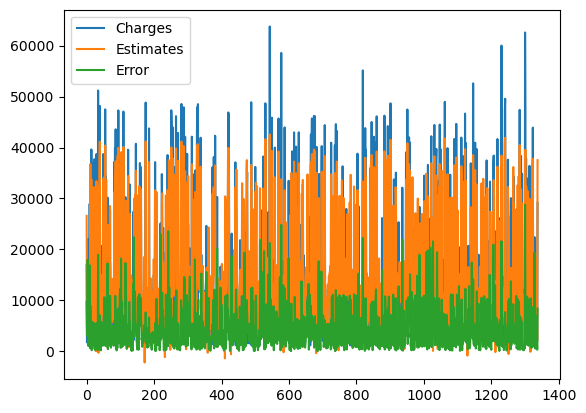

In [371]:
fig, ax = plt.subplots()
ax.plot(indices_list, insurance_charges, label="Charges")
ax.plot(indices_list, estimated_charges, label="Estimates")
ax.plot(indices_list, errors_list, label="Error")
plt.legend()
plt.show()